# Problem 1

Consider a sequence x[n] = (−1)n obtained by sampling x(t) = cos(ω0t) with sampling interval being 1ms. List three distinct possible values of ω0.

### Answer:

The discrete sequence \( x[n] \) is:

$$
\cos(\omega_0 n T_s) = (-1)^n = \cos(\pi n).
$$


This implies:
$$
\omega_0 T_s = \pi + 2k\pi, \quad k \in \mathbb{Z}.
$$

Substituting \( T_s = 0.001 \):
$$
\omega_0 = \frac{\pi + 2k\pi}{0.001} = 1000\pi (1 + 2k).
$$

Thus, three distinct possible values of \( \omega_0 \) are:
$$
\omega_0 = 1000\pi, \, 3000\pi, \, \text{and } 5000\pi.
$$


# Problem 2

Generate a x(t) = sin(2πf1t) + sin(2πf2t), where f1 = 5Hz, f2 = 20Hz. Use three distinct sampling rates: 50Hz, 25Hz, and 15Hz to sample x(t). Plot the sampled signals, and compare the sampled signal with the original one. Explain your observations using the sampling theorem. Include your plot to the submission. Submit your code as an attachment or comment on Canavs.

In [71]:
import numpy as np
import matplotlib.pyplot as plt

In [72]:
def generate_sine(t_duration, f0, fs):
    time_steps = np.linspace(0, t_duration - 1/fs, int(t_duration * fs) * 10) # Make curve smoother
    sin_wave = np.sin(2 * np.pi * f0 * time_steps)
    
    return time_steps, sin_wave
    


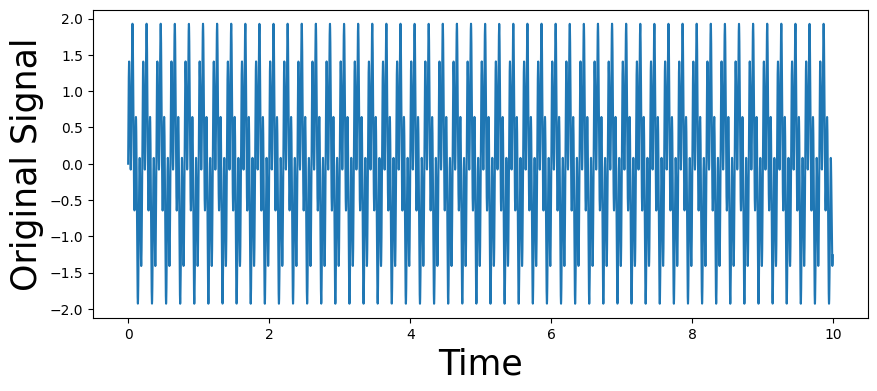

In [73]:
duration = 10
time_steps, low_freq_signal = generate_sine(t_duration=duration, f0=5, fs=100)
_, high_freq_signal = generate_sine(t_duration=duration, f0=20, fs=100)
signal = low_freq_signal + high_freq_signal

plt.figure(figsize=(10, 4))
_ = plt.plot(time_steps, signal)
_ = plt.xlabel('Time', fontsize = 25)
_ = plt.ylabel('Original Signal', fontsize = 25)

In [74]:
def sample_and_plot(signal, time_steps, rate):
    time_steps_new = np.linspace(0, duration, int(duration * rate)) 
    sampled_signal = np.interp(time_steps_new, time_steps, signal)

    plt.figure(figsize=(10, 4))

    # Plot original signal
    plt.plot(time_steps, signal, 'b-', alpha=0.5, label='Original')
    # Plot sampled points
    plt.plot(time_steps_new, sampled_signal, 'r.', label='Sampled') 
    # plt.legend(fontsize=15)

    _ = plt.xlabel('Time', fontsize = 25)
    _ = plt.ylabel(f'Sampled Signal ({rate}Hz)', fontsize = 25)

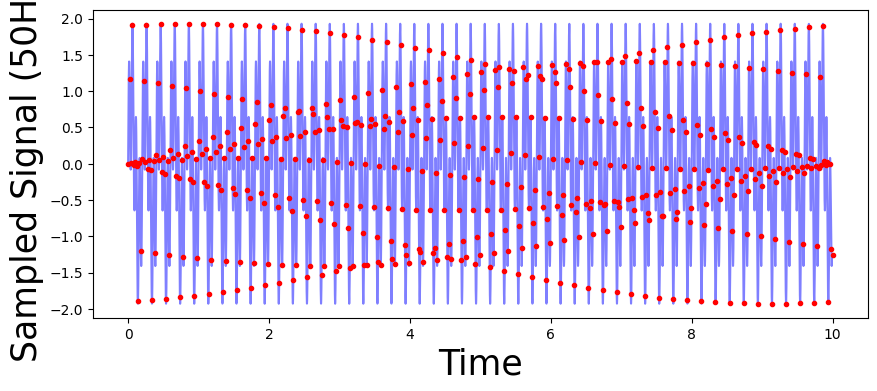

In [75]:
# your code goes here
# call generate_sine to plot the sampled signal

sample_and_plot(signal, time_steps, 50)


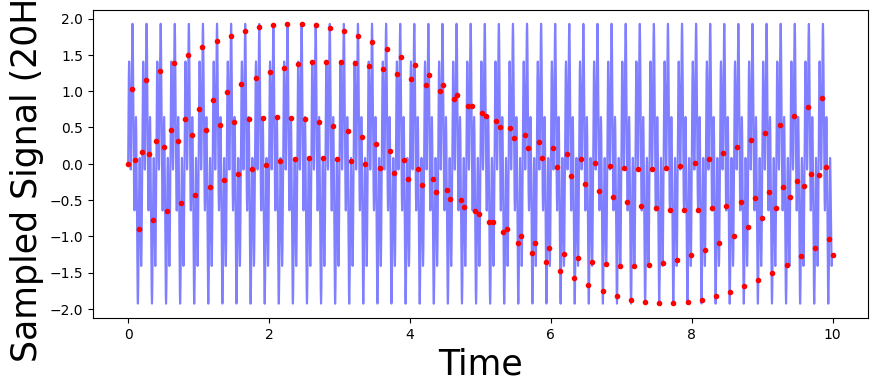

In [76]:
# your code goes here
# call generate_sine to plot the sampled signal

sample_and_plot(signal, time_steps, 20)


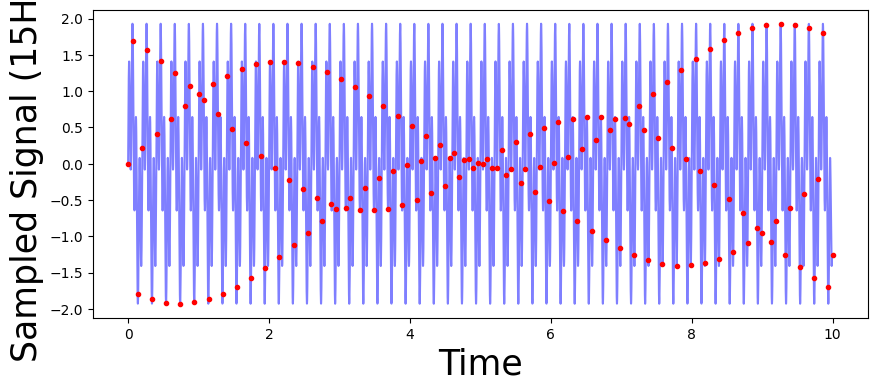

In [77]:
# your code goes here
# call generate_sine to plot the sampled signal

sample_and_plot(signal, time_steps, 15)


### Sampling at 50Hz
- The highest frequency in the signal is **20Hz**, so the Nyquist rate is **40Hz**.
- Since 50Hz > 40Hz, the sampled points closely match the original signal.
- The reconstruction would be **accurate** without aliasing.

### Sampling at 25Hz
- The sampling rate is **above** the Nyquist rate for 5Hz but **below** for 20Hz.
- The **20Hz component gets aliased**, appearing as a lower frequency in the sampled signal.
- This results in a **distorted** representation of the original signal.

### Sampling at 15Hz
- **Severe aliasing** occurs, making the reconstructed signal look **very different** from the actual signal.
- The original high-frequency components are **misinterpreted** as lower frequencies.

